In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
sns.set()
from sklearn.linear_model import LinearRegression
from statsmodels.regression.linear_model import OLS
from sklearn.metrics import mean_squared_log_error
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
import sklearn

In [130]:
#train = pd.read_csv('./data_1-First/Fina_Train.csv')
#test = pd.read_csv('./data_1-First/Fina_Test.csv')
train = pd.read_csv('./Data/Train-19-10-Final.csv')
test = pd.read_csv('./Data/Test-19-10-Final.csv')

In [131]:
y = train['TARGET(PRICE_IN_LACS)']
x = train.drop(['TARGET(PRICE_IN_LACS)','ADDRESS','CITY','READY_TO_MOVE','SQFT_P_ROOM', 'Lo+Li',],axis=1)


In [132]:
train.columns

Index(['POSTED_BY', 'UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'BHK_OR_RK',
       'SQUARE_FT', 'READY_TO_MOVE', 'RESALE', 'ADDRESS', 'LONGITUDE',
       'LATITUDE', 'TARGET(PRICE_IN_LACS)', 'CITY', 'IN_CITY', 'CITY_2',
       'SQFT_P_ROOM', 'Lo+Li', 'Rare_House', 'City_Type'],
      dtype='object')

In [133]:
cat_col=['BHK_NO.','IN_CITY', 'CITY_2','City_Type']

### Data Engineering

In [134]:
#x['Area'] =pd.qcut(x['SQUARE_FT'],5,labels=[0,1,2,3,4])


In [135]:
#x['Area'] = x['Area'].astype(int)

### Mapping

In [136]:
bhk_or_rak = {'BHK':1,
             'RK':0}
posted_by = {'Dealer':0,'Owner':1,'Builder':2}
city_typ = {'Metro':0,'Town':1,'Village':2,'City':3,'Unknown':4}


In [137]:
for df in [x,test]:
    df['BHK_OR_RK'] = df['BHK_OR_RK'].replace(bhk_or_rak)
    df['POSTED_BY'] = df['POSTED_BY'].replace(posted_by)
    df['City_Type'] = df['City_Type'].replace(city_typ)
    df['LONGITUDE'] = np.log(df['LONGITUDE'])
    #df['l*l'] = np.log(df['LONGITUDE'])*df['LATITUDE']

G:\Installed\envs\tensorflowenv\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [138]:
pd.options.display.max_rows = None

In [139]:
for df in [x,test]:
    main_city = df['CITY_2'].value_counts()[df['CITY_2'].value_counts() >=100].index.values
    df['CITY']=df['CITY_2'].map(lambda x: x if x in main_city else 'Others')
    in_city = df['IN_CITY'].value_counts()[df['IN_CITY'].value_counts() >=100].index.values
    df['CITY_IN']=df['IN_CITY'].map(lambda x: x if x in in_city else 'Others')
   

In [140]:
city_encode = LabelEncoder()
city_encode.fit(list(set(x['CITY']) | set(test['CITY'])))
in_city_encode = LabelEncoder()
in_city_encode.fit(list(set(x['CITY_IN']) | set(test['CITY_IN'])))
for df in [x,test]:
    df['CITY'] = city_encode.transform(df['CITY'] )
    df['CITY_IN'] = in_city_encode.transform(df['CITY_IN'].astype(str))

In [141]:
x = x.drop(['CITY_2','IN_CITY'],axis=1)
test = test.drop(['CITY_2','IN_CITY'],axis=1)

In [142]:
test.head()

,Unnamed: 0,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,CITY,SQFT_P_ROOM,Lo+Li,Rare_House,City_Type,CITY_IN
0,0,1,0,0,1,1,545.171340,1,1,"Kamrej,Surat",3.056921,4.291113,54,545.171340,7.348034,0,1,60
1,1,0,1,1,2,1,800.000000,0,0,"Panvel,Lalitpur",2.942654,4.292489,31,400.000000,7.235142,0,0,63
2,2,0,0,0,2,1,1257.096513,1,1,"New Town,Kolkata",3.117605,4.482832,29,628.548257,7.600437,0,0,58
3,3,0,0,0,3,1,1400.329489,1,1,"Kalwar Road,Jaipur",3.295403,4.325253,24,466.776496,7.620656,0,3,60
4,4,1,0,0,1,1,430.477830,1,1,"Mai Mandir,Nadiad",3.122365,4.288677,42,430.477830,7.411042,0,2,60


In [143]:
'''for df in [x,test]:
    df['BHK_CITY'] = df['CITY_2']+df['BHK_NO.']
    df['BHK_IN_CITY'] = df['IN_CITY']+df['BHK_NO.']
    df['multi'] = df['BHK_NO.']*df['SQUARE_FT']'''

"for df in [x,test]:\n    df['BHK_CITY'] = df['CITY_2']+df['BHK_NO.']\n    df['BHK_IN_CITY'] = df['IN_CITY']+df['BHK_NO.']\n    df['multi'] = df['BHK_NO.']*df['SQUARE_FT']"

In [144]:
#final_x = x.drop(['LATITUDE','LONGITUDE'],axis=1)


In [146]:
#final_x = x.drop()
final_x = x.copy()
'''final_x = x.drop(['LONGITUDE',
 'Lo+Li',
 'SQFT_P_ROOM',
 'l*l'],axis=1)
'''

"final_x = x.drop(['LONGITUDE',\n 'Lo+Li',\n 'SQFT_P_ROOM',\n 'l*l'],axis=1)\n"

In [147]:
final_x.merge(y,on=x.index).drop(['key_0'],axis=1).to_csv('./Data/Train-All-Selected-Cities.csv',index=False)
test.to_csv('./Data/Test-All-Selected-Cities.csv',index=False)


### Correlation

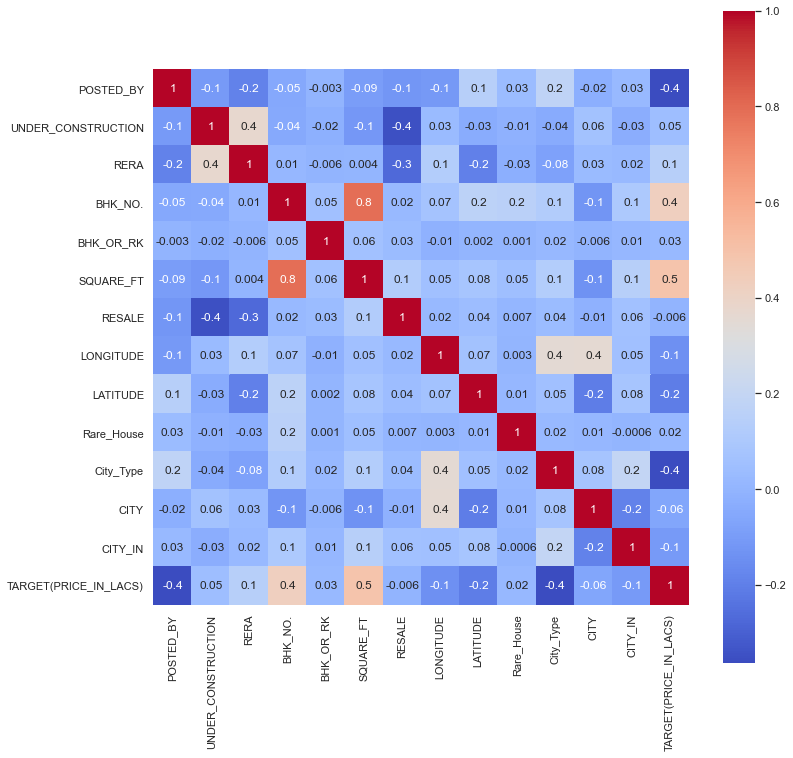

In [86]:
plt.figure(figsize=(12,12))
sns.heatmap(final_x.merge(y,on=x.index).drop(['key_0'],axis=1).corr(),annot=True,cmap='coolwarm',square=True,fmt='0.1g')

## Split

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [88]:
'''scaler = StandardScaler().fit(final_x)
temp = scaler.transform(final_x)
final_x = pd.DataFrame(data = temp,columns=final_x.columns.values)'''

'scaler = StandardScaler().fit(final_x)\ntemp = scaler.transform(final_x)\nfinal_x = pd.DataFrame(data = temp,columns=final_x.columns.values)'

In [89]:
x_train,x_test,y_train,y_test = train_test_split(final_x,y,train_size=0.7,random_state=22)

x_test,x_valid,y_test,y_valid = train_test_split(x_test,y_test,train_size=0.5,random_state=2)
x_train.shape,x_test.shape,x_valid.shape

((18251, 13), (3911, 13), (3912, 13))

### XGBoost

In [90]:
from xgboost import XGBRegressor,plot_importance,plot_tree
import xgboost as xgb

In [91]:
'''reg = XGBRegressor(n_estimators=2000,objective='reg:squaredlogerror',verbosity=1,tree_method='exact',n_jobs=-1)
score = reg.fit(final_x,y)
pred = score.predict(final_x)
train_acc = 100-mean_squared_log_error(np.exp(y),np.exp(pred))*100
#test_acc = 100-mean_squared_log_error(np.exp(y_test),np.exp(score.predict(x_test)))*100
print('Train',train_acc)
#print('Test',test_acc)
'''

"reg = XGBRegressor(n_estimators=2000,objective='reg:squaredlogerror',verbosity=1,tree_method='exact',n_jobs=-1)\nscore = reg.fit(final_x,y)\npred = score.predict(final_x)\ntrain_acc = 100-mean_squared_log_error(np.exp(y),np.exp(pred))*100\n#test_acc = 100-mean_squared_log_error(np.exp(y_test),np.exp(score.predict(x_test)))*100\nprint('Train',train_acc)\n#print('Test',test_acc)\n"

In [92]:
x_train.shape

(18251, 13)

In [93]:
max_depth = [ 6,7,8,9,]
eta = [0.2,0.3,0.4]
early_stopping_rounds = 20

In [94]:
y.max()

6.016157159698354

In [95]:
#reg = XGBRegressor(objective='reg:squaredlogerror' ,n_jobs=-1,n_estimators=500,verbosity=1,eta=0.4,gamma=0.001,max_depth= 6, min_child_weight= 1)
eval_set = [(x_train, y_train),(x_test, y_test),(x_valid,y_valid) ]
reg = XGBRegressor(objective='reg:squaredlogerror' ,n_jobs=4,n_estimators=3000,gamma=1e-05,eta=0.1,max_depth=4, min_child_weight=0.001)

score = reg.fit(x_train,y_train,verbose=True,eval_metric=['rmsle'],eval_set=eval_set,early_stopping_rounds=20)
pred = score.predict(x_train)
train_acc = 100-mean_squared_log_error(np.exp(y_train),np.exp(pred))*100
test_acc = 100-mean_squared_log_error(np.exp(y_test),np.exp(score.predict(x_test)))*100
#train_acc = 100-mean_squared_log_error(y_train,pred)*100
#test_acc = 100-mean_squared_log_error(y_test,score.predict(x_test))*100

print('Train',train_acc)
print('Test',test_acc)


[0]	validation_0-rmsle:1.16855	validation_1-rmsle:1.16696	validation_2-rmsle:1.16934
Multiple eval metrics have been passed: 'validation_2-rmsle' will be used for early stopping.

Will train until validation_2-rmsle hasn't improved in 20 rounds.
[1]	validation_0-rmsle:1.11655	validation_1-rmsle:1.11496	validation_2-rmsle:1.11726
[2]	validation_0-rmsle:1.06565	validation_1-rmsle:1.06407	validation_2-rmsle:1.06629
[3]	validation_0-rmsle:1.01588	validation_1-rmsle:1.01431	validation_2-rmsle:1.01645
[4]	validation_0-rmsle:0.96728	validation_1-rmsle:0.96572	validation_2-rmsle:0.96777
[5]	validation_0-rmsle:0.91988	validation_1-rmsle:0.91834	validation_2-rmsle:0.92029
[6]	validation_0-rmsle:0.87372	validation_1-rmsle:0.87217	validation_2-rmsle:0.87405
[7]	validation_0-rmsle:0.82881	validation_1-rmsle:0.82726	validation_2-rmsle:0.82907
[8]	validation_0-rmsle:0.78520	validation_1-rmsle:0.78365	validation_2-rmsle:0.78538
[9]	validation_0-rmsle:0.74291	validation_1-rmsle:0.74136	validation_2-rms

[94]	validation_0-rmsle:0.06495	validation_1-rmsle:0.06685	validation_2-rmsle:0.06593
[95]	validation_0-rmsle:0.06491	validation_1-rmsle:0.06681	validation_2-rmsle:0.06590
[96]	validation_0-rmsle:0.06482	validation_1-rmsle:0.06676	validation_2-rmsle:0.06585
[97]	validation_0-rmsle:0.06476	validation_1-rmsle:0.06672	validation_2-rmsle:0.06580
[98]	validation_0-rmsle:0.06466	validation_1-rmsle:0.06662	validation_2-rmsle:0.06573
[99]	validation_0-rmsle:0.06460	validation_1-rmsle:0.06658	validation_2-rmsle:0.06566
[100]	validation_0-rmsle:0.06451	validation_1-rmsle:0.06652	validation_2-rmsle:0.06561
[101]	validation_0-rmsle:0.06435	validation_1-rmsle:0.06639	validation_2-rmsle:0.06547
[102]	validation_0-rmsle:0.06420	validation_1-rmsle:0.06622	validation_2-rmsle:0.06532
[103]	validation_0-rmsle:0.06414	validation_1-rmsle:0.06618	validation_2-rmsle:0.06529
[104]	validation_0-rmsle:0.06409	validation_1-rmsle:0.06613	validation_2-rmsle:0.06526
[105]	validation_0-rmsle:0.06405	validation_1-rms

[189]	validation_0-rmsle:0.06014	validation_1-rmsle:0.06295	validation_2-rmsle:0.06224
[190]	validation_0-rmsle:0.06012	validation_1-rmsle:0.06295	validation_2-rmsle:0.06224
[191]	validation_0-rmsle:0.06009	validation_1-rmsle:0.06292	validation_2-rmsle:0.06221
[192]	validation_0-rmsle:0.06000	validation_1-rmsle:0.06285	validation_2-rmsle:0.06214
[193]	validation_0-rmsle:0.05998	validation_1-rmsle:0.06283	validation_2-rmsle:0.06213
[194]	validation_0-rmsle:0.05994	validation_1-rmsle:0.06281	validation_2-rmsle:0.06211
[195]	validation_0-rmsle:0.05991	validation_1-rmsle:0.06277	validation_2-rmsle:0.06208
[196]	validation_0-rmsle:0.05983	validation_1-rmsle:0.06270	validation_2-rmsle:0.06202
[197]	validation_0-rmsle:0.05976	validation_1-rmsle:0.06264	validation_2-rmsle:0.06195
[198]	validation_0-rmsle:0.05974	validation_1-rmsle:0.06261	validation_2-rmsle:0.06193
[199]	validation_0-rmsle:0.05967	validation_1-rmsle:0.06256	validation_2-rmsle:0.06188
[200]	validation_0-rmsle:0.05963	validation

[284]	validation_0-rmsle:0.05755	validation_1-rmsle:0.06111	validation_2-rmsle:0.06043
[285]	validation_0-rmsle:0.05754	validation_1-rmsle:0.06111	validation_2-rmsle:0.06043
[286]	validation_0-rmsle:0.05753	validation_1-rmsle:0.06110	validation_2-rmsle:0.06042
[287]	validation_0-rmsle:0.05750	validation_1-rmsle:0.06109	validation_2-rmsle:0.06041
[288]	validation_0-rmsle:0.05747	validation_1-rmsle:0.06108	validation_2-rmsle:0.06039
[289]	validation_0-rmsle:0.05744	validation_1-rmsle:0.06107	validation_2-rmsle:0.06037
[290]	validation_0-rmsle:0.05743	validation_1-rmsle:0.06107	validation_2-rmsle:0.06035
[291]	validation_0-rmsle:0.05742	validation_1-rmsle:0.06107	validation_2-rmsle:0.06034
[292]	validation_0-rmsle:0.05742	validation_1-rmsle:0.06106	validation_2-rmsle:0.06033
[293]	validation_0-rmsle:0.05740	validation_1-rmsle:0.06105	validation_2-rmsle:0.06033
[294]	validation_0-rmsle:0.05737	validation_1-rmsle:0.06104	validation_2-rmsle:0.06031
[295]	validation_0-rmsle:0.05735	validation

[379]	validation_0-rmsle:0.05587	validation_1-rmsle:0.06011	validation_2-rmsle:0.05938
[380]	validation_0-rmsle:0.05587	validation_1-rmsle:0.06011	validation_2-rmsle:0.05937
[381]	validation_0-rmsle:0.05583	validation_1-rmsle:0.06009	validation_2-rmsle:0.05934
[382]	validation_0-rmsle:0.05582	validation_1-rmsle:0.06008	validation_2-rmsle:0.05933
[383]	validation_0-rmsle:0.05579	validation_1-rmsle:0.06006	validation_2-rmsle:0.05930
[384]	validation_0-rmsle:0.05579	validation_1-rmsle:0.06006	validation_2-rmsle:0.05930
[385]	validation_0-rmsle:0.05577	validation_1-rmsle:0.06005	validation_2-rmsle:0.05929
[386]	validation_0-rmsle:0.05576	validation_1-rmsle:0.06005	validation_2-rmsle:0.05928
[387]	validation_0-rmsle:0.05574	validation_1-rmsle:0.06003	validation_2-rmsle:0.05927
[388]	validation_0-rmsle:0.05573	validation_1-rmsle:0.06003	validation_2-rmsle:0.05927
[389]	validation_0-rmsle:0.05571	validation_1-rmsle:0.06002	validation_2-rmsle:0.05924
[390]	validation_0-rmsle:0.05568	validation

[474]	validation_0-rmsle:0.05462	validation_1-rmsle:0.05948	validation_2-rmsle:0.05861
[475]	validation_0-rmsle:0.05462	validation_1-rmsle:0.05948	validation_2-rmsle:0.05860
[476]	validation_0-rmsle:0.05459	validation_1-rmsle:0.05945	validation_2-rmsle:0.05859
[477]	validation_0-rmsle:0.05456	validation_1-rmsle:0.05943	validation_2-rmsle:0.05858
[478]	validation_0-rmsle:0.05455	validation_1-rmsle:0.05943	validation_2-rmsle:0.05857
[479]	validation_0-rmsle:0.05453	validation_1-rmsle:0.05941	validation_2-rmsle:0.05854
[480]	validation_0-rmsle:0.05451	validation_1-rmsle:0.05941	validation_2-rmsle:0.05853
[481]	validation_0-rmsle:0.05449	validation_1-rmsle:0.05940	validation_2-rmsle:0.05853
[482]	validation_0-rmsle:0.05449	validation_1-rmsle:0.05939	validation_2-rmsle:0.05852
[483]	validation_0-rmsle:0.05447	validation_1-rmsle:0.05939	validation_2-rmsle:0.05852
[484]	validation_0-rmsle:0.05446	validation_1-rmsle:0.05939	validation_2-rmsle:0.05851
[485]	validation_0-rmsle:0.05446	validation

[569]	validation_0-rmsle:0.05338	validation_1-rmsle:0.05885	validation_2-rmsle:0.05792
[570]	validation_0-rmsle:0.05337	validation_1-rmsle:0.05883	validation_2-rmsle:0.05791
[571]	validation_0-rmsle:0.05337	validation_1-rmsle:0.05883	validation_2-rmsle:0.05791
[572]	validation_0-rmsle:0.05335	validation_1-rmsle:0.05882	validation_2-rmsle:0.05790
[573]	validation_0-rmsle:0.05335	validation_1-rmsle:0.05882	validation_2-rmsle:0.05790
[574]	validation_0-rmsle:0.05335	validation_1-rmsle:0.05882	validation_2-rmsle:0.05790
[575]	validation_0-rmsle:0.05334	validation_1-rmsle:0.05882	validation_2-rmsle:0.05789
[576]	validation_0-rmsle:0.05334	validation_1-rmsle:0.05882	validation_2-rmsle:0.05789
[577]	validation_0-rmsle:0.05334	validation_1-rmsle:0.05882	validation_2-rmsle:0.05789
[578]	validation_0-rmsle:0.05334	validation_1-rmsle:0.05882	validation_2-rmsle:0.05789
[579]	validation_0-rmsle:0.05334	validation_1-rmsle:0.05882	validation_2-rmsle:0.05789
[580]	validation_0-rmsle:0.05333	validation

[664]	validation_0-rmsle:0.05246	validation_1-rmsle:0.05850	validation_2-rmsle:0.05752
[665]	validation_0-rmsle:0.05245	validation_1-rmsle:0.05850	validation_2-rmsle:0.05752
[666]	validation_0-rmsle:0.05244	validation_1-rmsle:0.05849	validation_2-rmsle:0.05752
[667]	validation_0-rmsle:0.05243	validation_1-rmsle:0.05849	validation_2-rmsle:0.05751
[668]	validation_0-rmsle:0.05242	validation_1-rmsle:0.05848	validation_2-rmsle:0.05750
[669]	validation_0-rmsle:0.05241	validation_1-rmsle:0.05848	validation_2-rmsle:0.05750
[670]	validation_0-rmsle:0.05239	validation_1-rmsle:0.05847	validation_2-rmsle:0.05749
[671]	validation_0-rmsle:0.05238	validation_1-rmsle:0.05846	validation_2-rmsle:0.05749
[672]	validation_0-rmsle:0.05237	validation_1-rmsle:0.05844	validation_2-rmsle:0.05748
[673]	validation_0-rmsle:0.05236	validation_1-rmsle:0.05844	validation_2-rmsle:0.05747
[674]	validation_0-rmsle:0.05235	validation_1-rmsle:0.05843	validation_2-rmsle:0.05747
[675]	validation_0-rmsle:0.05235	validation

[759]	validation_0-rmsle:0.05180	validation_1-rmsle:0.05822	validation_2-rmsle:0.05726
[760]	validation_0-rmsle:0.05179	validation_1-rmsle:0.05822	validation_2-rmsle:0.05724
[761]	validation_0-rmsle:0.05178	validation_1-rmsle:0.05822	validation_2-rmsle:0.05724
[762]	validation_0-rmsle:0.05176	validation_1-rmsle:0.05822	validation_2-rmsle:0.05723
[763]	validation_0-rmsle:0.05176	validation_1-rmsle:0.05821	validation_2-rmsle:0.05723
[764]	validation_0-rmsle:0.05175	validation_1-rmsle:0.05821	validation_2-rmsle:0.05723
[765]	validation_0-rmsle:0.05174	validation_1-rmsle:0.05820	validation_2-rmsle:0.05722
[766]	validation_0-rmsle:0.05172	validation_1-rmsle:0.05819	validation_2-rmsle:0.05720
[767]	validation_0-rmsle:0.05172	validation_1-rmsle:0.05819	validation_2-rmsle:0.05720
[768]	validation_0-rmsle:0.05171	validation_1-rmsle:0.05818	validation_2-rmsle:0.05720
[769]	validation_0-rmsle:0.05171	validation_1-rmsle:0.05818	validation_2-rmsle:0.05720
[770]	validation_0-rmsle:0.05171	validation

In [96]:
np.sqrt(mean_squared_log_error(y_valid,score.predict(x_valid)))

0.057198099774890813

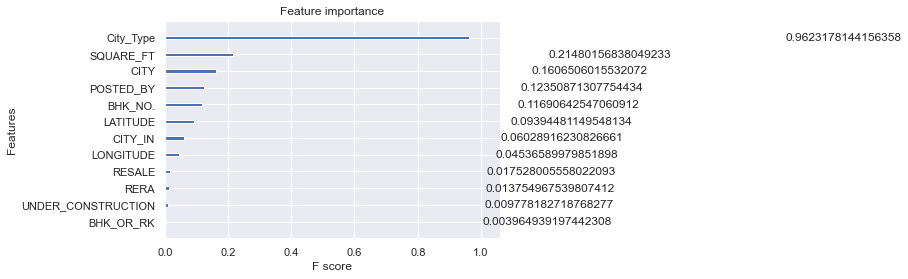

In [98]:
#fig,ax = plt.subplots(figsize=(12,8))
plot_importance(score,importance_type='gain')

In [99]:
xgb = XGBRegressor(nthread=-1) 



### Randomised Search

In [100]:
from scipy import stats
from scipy.stats import randint

In [101]:
param_dist = {'n_estimators': [3000],
              'learning_rate': stats.uniform(0.01, 0.4),
              'subsample': stats.uniform(0.3, 0.9),
              'gamma':stats.uniform(0, 1),
              'max_depth': [3,4,5, 6, 7,8,9],
              'colsample_bytree': stats.uniform(0.5, 0.9),
              'min_child_weight': stats.uniform(0, 1),
              'subsample':stats.uniform(0.5, 1),
               'colsample_bytree':stats.uniform(0.5, 1),
             }
rgrid = RandomizedSearchCV(xgb, param_distributions = param_dist,scoring='neg_mean_squared_log_error',verbose=3,n_jobs=4,cv=3)
model  = rgrid.fit(x_train,y_train,verbose=True,eval_metric=['rmsle'],eval_set=eval_set,early_stopping_rounds=20)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:   25.5s finished


[0]	validation_0-rmsle:1.10678	validation_1-rmsle:1.10549	validation_2-rmsle:1.10733
Multiple eval metrics have been passed: 'validation_2-rmsle' will be used for early stopping.

Will train until validation_2-rmsle hasn't improved in 20 rounds.
[1]	validation_0-rmsle:1.00914	validation_1-rmsle:1.00821	validation_2-rmsle:1.00963
[2]	validation_0-rmsle:0.92465	validation_1-rmsle:0.92382	validation_2-rmsle:0.92501
[3]	validation_0-rmsle:0.85075	validation_1-rmsle:0.85004	validation_2-rmsle:0.85103
[4]	validation_0-rmsle:0.78531	validation_1-rmsle:0.78469	validation_2-rmsle:0.78557
[5]	validation_0-rmsle:0.72703	validation_1-rmsle:0.72647	validation_2-rmsle:0.72728
[6]	validation_0-rmsle:0.67474	validation_1-rmsle:0.67432	validation_2-rmsle:0.67497
[7]	validation_0-rmsle:0.62761	validation_1-rmsle:0.62727	validation_2-rmsle:0.62775
[8]	validation_0-rmsle:0.58485	validation_1-rmsle:0.58456	validation_2-rmsle:0.58494
[9]	validation_0-rmsle:0.54591	validation_1-rmsle:0.54554	validation_2-rms

[94]	validation_0-rmsle:0.05576	validation_1-rmsle:0.06089	validation_2-rmsle:0.05957
[95]	validation_0-rmsle:0.05564	validation_1-rmsle:0.06078	validation_2-rmsle:0.05950
[96]	validation_0-rmsle:0.05548	validation_1-rmsle:0.06069	validation_2-rmsle:0.05940
[97]	validation_0-rmsle:0.05541	validation_1-rmsle:0.06065	validation_2-rmsle:0.05936
[98]	validation_0-rmsle:0.05533	validation_1-rmsle:0.06063	validation_2-rmsle:0.05932
[99]	validation_0-rmsle:0.05527	validation_1-rmsle:0.06060	validation_2-rmsle:0.05930
[100]	validation_0-rmsle:0.05523	validation_1-rmsle:0.06058	validation_2-rmsle:0.05928
[101]	validation_0-rmsle:0.05518	validation_1-rmsle:0.06055	validation_2-rmsle:0.05924
[102]	validation_0-rmsle:0.05513	validation_1-rmsle:0.06055	validation_2-rmsle:0.05923
[103]	validation_0-rmsle:0.05508	validation_1-rmsle:0.06054	validation_2-rmsle:0.05921
[104]	validation_0-rmsle:0.05499	validation_1-rmsle:0.06048	validation_2-rmsle:0.05917
[105]	validation_0-rmsle:0.05496	validation_1-rms

[189]	validation_0-rmsle:0.05114	validation_1-rmsle:0.05869	validation_2-rmsle:0.05715
[190]	validation_0-rmsle:0.05109	validation_1-rmsle:0.05867	validation_2-rmsle:0.05712
[191]	validation_0-rmsle:0.05108	validation_1-rmsle:0.05867	validation_2-rmsle:0.05712
[192]	validation_0-rmsle:0.05105	validation_1-rmsle:0.05864	validation_2-rmsle:0.05709
[193]	validation_0-rmsle:0.05101	validation_1-rmsle:0.05861	validation_2-rmsle:0.05707
[194]	validation_0-rmsle:0.05096	validation_1-rmsle:0.05859	validation_2-rmsle:0.05706
[195]	validation_0-rmsle:0.05092	validation_1-rmsle:0.05857	validation_2-rmsle:0.05704
[196]	validation_0-rmsle:0.05090	validation_1-rmsle:0.05856	validation_2-rmsle:0.05702
[197]	validation_0-rmsle:0.05085	validation_1-rmsle:0.05853	validation_2-rmsle:0.05701
[198]	validation_0-rmsle:0.05081	validation_1-rmsle:0.05851	validation_2-rmsle:0.05698
[199]	validation_0-rmsle:0.05078	validation_1-rmsle:0.05851	validation_2-rmsle:0.05696
[200]	validation_0-rmsle:0.05076	validation

[284]	validation_0-rmsle:0.04844	validation_1-rmsle:0.05767	validation_2-rmsle:0.05606
[285]	validation_0-rmsle:0.04841	validation_1-rmsle:0.05766	validation_2-rmsle:0.05604
[286]	validation_0-rmsle:0.04839	validation_1-rmsle:0.05763	validation_2-rmsle:0.05604
[287]	validation_0-rmsle:0.04838	validation_1-rmsle:0.05764	validation_2-rmsle:0.05604
[288]	validation_0-rmsle:0.04836	validation_1-rmsle:0.05763	validation_2-rmsle:0.05602
[289]	validation_0-rmsle:0.04834	validation_1-rmsle:0.05763	validation_2-rmsle:0.05603
[290]	validation_0-rmsle:0.04831	validation_1-rmsle:0.05761	validation_2-rmsle:0.05602
[291]	validation_0-rmsle:0.04829	validation_1-rmsle:0.05761	validation_2-rmsle:0.05601
[292]	validation_0-rmsle:0.04827	validation_1-rmsle:0.05759	validation_2-rmsle:0.05599
[293]	validation_0-rmsle:0.04825	validation_1-rmsle:0.05759	validation_2-rmsle:0.05599
[294]	validation_0-rmsle:0.04823	validation_1-rmsle:0.05759	validation_2-rmsle:0.05600
[295]	validation_0-rmsle:0.04818	validation

[379]	validation_0-rmsle:0.04657	validation_1-rmsle:0.05707	validation_2-rmsle:0.05537
[380]	validation_0-rmsle:0.04655	validation_1-rmsle:0.05706	validation_2-rmsle:0.05537
[381]	validation_0-rmsle:0.04652	validation_1-rmsle:0.05705	validation_2-rmsle:0.05534
[382]	validation_0-rmsle:0.04650	validation_1-rmsle:0.05706	validation_2-rmsle:0.05534
[383]	validation_0-rmsle:0.04648	validation_1-rmsle:0.05706	validation_2-rmsle:0.05534
[384]	validation_0-rmsle:0.04647	validation_1-rmsle:0.05706	validation_2-rmsle:0.05533
[385]	validation_0-rmsle:0.04646	validation_1-rmsle:0.05706	validation_2-rmsle:0.05533
[386]	validation_0-rmsle:0.04644	validation_1-rmsle:0.05705	validation_2-rmsle:0.05532
[387]	validation_0-rmsle:0.04642	validation_1-rmsle:0.05705	validation_2-rmsle:0.05532
[388]	validation_0-rmsle:0.04642	validation_1-rmsle:0.05704	validation_2-rmsle:0.05532
[389]	validation_0-rmsle:0.04640	validation_1-rmsle:0.05704	validation_2-rmsle:0.05533
[390]	validation_0-rmsle:0.04640	validation

[474]	validation_0-rmsle:0.04518	validation_1-rmsle:0.05677	validation_2-rmsle:0.05503
[475]	validation_0-rmsle:0.04518	validation_1-rmsle:0.05677	validation_2-rmsle:0.05504
[476]	validation_0-rmsle:0.04517	validation_1-rmsle:0.05676	validation_2-rmsle:0.05504
[477]	validation_0-rmsle:0.04515	validation_1-rmsle:0.05676	validation_2-rmsle:0.05503
[478]	validation_0-rmsle:0.04514	validation_1-rmsle:0.05676	validation_2-rmsle:0.05503
[479]	validation_0-rmsle:0.04513	validation_1-rmsle:0.05676	validation_2-rmsle:0.05503
[480]	validation_0-rmsle:0.04510	validation_1-rmsle:0.05675	validation_2-rmsle:0.05502
[481]	validation_0-rmsle:0.04508	validation_1-rmsle:0.05674	validation_2-rmsle:0.05501
[482]	validation_0-rmsle:0.04507	validation_1-rmsle:0.05674	validation_2-rmsle:0.05501
[483]	validation_0-rmsle:0.04507	validation_1-rmsle:0.05674	validation_2-rmsle:0.05501
[484]	validation_0-rmsle:0.04505	validation_1-rmsle:0.05673	validation_2-rmsle:0.05501
[485]	validation_0-rmsle:0.04504	validation

[569]	validation_0-rmsle:0.04405	validation_1-rmsle:0.05654	validation_2-rmsle:0.05479
[570]	validation_0-rmsle:0.04405	validation_1-rmsle:0.05654	validation_2-rmsle:0.05479
[571]	validation_0-rmsle:0.04404	validation_1-rmsle:0.05654	validation_2-rmsle:0.05479
[572]	validation_0-rmsle:0.04403	validation_1-rmsle:0.05654	validation_2-rmsle:0.05478
[573]	validation_0-rmsle:0.04402	validation_1-rmsle:0.05654	validation_2-rmsle:0.05478
[574]	validation_0-rmsle:0.04402	validation_1-rmsle:0.05654	validation_2-rmsle:0.05478
[575]	validation_0-rmsle:0.04401	validation_1-rmsle:0.05654	validation_2-rmsle:0.05477
[576]	validation_0-rmsle:0.04400	validation_1-rmsle:0.05654	validation_2-rmsle:0.05477
[577]	validation_0-rmsle:0.04399	validation_1-rmsle:0.05654	validation_2-rmsle:0.05476
[578]	validation_0-rmsle:0.04398	validation_1-rmsle:0.05654	validation_2-rmsle:0.05477
[579]	validation_0-rmsle:0.04395	validation_1-rmsle:0.05653	validation_2-rmsle:0.05475
[580]	validation_0-rmsle:0.04394	validation

[664]	validation_0-rmsle:0.04315	validation_1-rmsle:0.05648	validation_2-rmsle:0.05458
[665]	validation_0-rmsle:0.04315	validation_1-rmsle:0.05647	validation_2-rmsle:0.05458
[666]	validation_0-rmsle:0.04315	validation_1-rmsle:0.05648	validation_2-rmsle:0.05458
[667]	validation_0-rmsle:0.04314	validation_1-rmsle:0.05647	validation_2-rmsle:0.05459
[668]	validation_0-rmsle:0.04313	validation_1-rmsle:0.05646	validation_2-rmsle:0.05459
[669]	validation_0-rmsle:0.04311	validation_1-rmsle:0.05647	validation_2-rmsle:0.05459
[670]	validation_0-rmsle:0.04310	validation_1-rmsle:0.05647	validation_2-rmsle:0.05458
[671]	validation_0-rmsle:0.04309	validation_1-rmsle:0.05645	validation_2-rmsle:0.05456
[672]	validation_0-rmsle:0.04307	validation_1-rmsle:0.05645	validation_2-rmsle:0.05456
[673]	validation_0-rmsle:0.04306	validation_1-rmsle:0.05644	validation_2-rmsle:0.05455
[674]	validation_0-rmsle:0.04306	validation_1-rmsle:0.05644	validation_2-rmsle:0.05455
[675]	validation_0-rmsle:0.04305	validation

In [102]:
np.sqrt(mean_squared_log_error(y_valid,model.predict(x_valid)))

0.054527685997558646

In [103]:
model.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8746186890097154,
             gamma=0.22077140503254167, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.05050818519358739,
             max_delta_step=0, max_depth=7, min_child_weight=0.9026806383004178,
             missing=nan, monotone_constraints='()', n_estimators=3000,
             n_jobs=-1, nthread=-1, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             subsample=0.7237349694142392, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [ ]:
validation_0-rmsle:0.04115	validation_1-rmsle:0.05546	validation_2-rmsle:0.05218


validation_0-rmsle:0.02974	validation_1-rmsle:0.05053	validation_2-rmsle:0.04940

reg = XGBRegressor(objective='reg:squaredlogerror' ,n_jobs=-1,n_estimators=1000,eta=0.3,max_depth=9,gamma=0.00001)

score = reg.fit(x_train,y_train,verbose=True,eval_metric=['rmsle'],eval_set=eval_set,early_stopping_rounds=20)


results = reg.evals_result()
epochs = len(results['validation_0']['rmsle'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = plt.subplots(figsize=(16,8))
ax.plot(x_axis, results['validation_0']['rmsle'], label='Train')
ax.plot(x_axis, results['validation_1']['rmsle'], label='Test')
ax.plot(x_axis, results['validation_1']['rmsle'], label='Valid')

ax.legend()
plt.ylabel('rmsle ')
plt.title('XGBoost rmsle ')
plt.show()

In [ ]:
#fig,ax = plt.subplots(figsize=(12,12))


## Prediction

In [104]:
#test = pd.read_csv('./Test-19-10.csv')
test = test.drop(['ADDRESS','CITY','READY_TO_MOVE','SQFT_P_ROOM', 'Lo+Li'],axis=1)

In [105]:
test.head()

,Unnamed: 0,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,RESALE,LONGITUDE,LATITUDE,Rare_House,City_Type,CITY_IN
0,0,1,0,0,1,1,545.171340,1,3.056921,4.291113,0,1,60
1,1,0,1,1,2,1,800.000000,0,2.942654,4.292489,0,0,63
2,2,0,0,0,2,1,1257.096513,1,3.117605,4.482832,0,0,58
3,3,0,0,0,3,1,1400.329489,1,3.295403,4.325253,0,3,60
4,4,1,0,0,1,1,430.477830,1,3.122365,4.288677,0,2,60


In [106]:
test = test.iloc[:,1:]

In [107]:
test.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,RESALE,LONGITUDE,LATITUDE,Rare_House,City_Type,CITY_IN
0,1,0,0,1,1,545.171340,1,3.056921,4.291113,0,1,60
1,0,1,1,2,1,800.000000,0,2.942654,4.292489,0,0,63
2,0,0,0,2,1,1257.096513,1,3.117605,4.482832,0,0,58
3,0,0,0,3,1,1400.329489,1,3.295403,4.325253,0,3,60
4,1,0,0,1,1,430.477830,1,3.122365,4.288677,0,2,60


In [108]:
#test['LONGITUDE'] = np.log(test['LONGITUDE'])
final_test = test.copy()

In [109]:
final_test.shape

(68720, 12)

In [110]:
final_test.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,RESALE,LONGITUDE,LATITUDE,Rare_House,City_Type,CITY_IN
0,1,0,0,1,1,545.171340,1,3.056921,4.291113,0,1,60
1,0,1,1,2,1,800.000000,0,2.942654,4.292489,0,0,63
2,0,0,0,2,1,1257.096513,1,3.117605,4.482832,0,0,58
3,0,0,0,3,1,1400.329489,1,3.295403,4.325253,0,3,60
4,1,0,0,1,1,430.477830,1,3.122365,4.288677,0,2,60


In [111]:
final_test['TARGET(PRICE_IN_LACS)'] = np.exp(model.predict(final_test))

ValueError: feature_names mismatch: ['POSTED_BY', 'UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'BHK_OR_RK', 'SQUARE_FT', 'RESALE', 'LONGITUDE', 'LATITUDE', 'Rare_House', 'City_Type', 'CITY', 'CITY_IN'] ['POSTED_BY', 'UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'BHK_OR_RK', 'SQUARE_FT', 'RESALE', 'LONGITUDE', 'LATITUDE', 'Rare_House', 'City_Type', 'CITY_IN']
expected CITY in input data

In [157]:
final_test['TARGET(PRICE_IN_LACS)'].head()

0    11.930201
1    72.500893
2    58.105850
3    27.660633
4    16.680628
Name: TARGET(PRICE_IN_LACS), dtype: float32

In [158]:
final_test['TARGET(PRICE_IN_LACS)'].to_csv('Submission 20.csv',index=False)